## S-MODE IOP2 Wave Glider plots

* Uses cleaned up S-MODE files made using ./S-MODE_analysis/code_IOP2/WG_realtime_cleanup.ipynb

first cut for IOP2 by [@jtomfarrar](https://github.com/jtomfarrar), 10/20/2022  




In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import requests
import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory
from scipy.stats import binned_statistic_2d

In [2]:
plt.close('all')

In [3]:
%matplotlib inline
%matplotlib widget
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 400

__figdir__ = '../plots/vel_fits/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [4]:
savefig = True


In [5]:
# List of WGs
WG_list = ['WHOI22','WHOI32','WHOI43','STOKES', 'PLANCK', 'KELVIN', 'CARSON']
path='../data/raw/WG_NRT_IOP2/'

In [6]:
# Make a list of the files:
n=0
file_list = []
for WG in WG_list:
    file = path+'adcp_'+WG+'.nc'
    file_list.append(file)

In [7]:
file_list

['../data/raw/WG_NRT_IOP2/adcp_WHOI22.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI32.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI43.nc',
 '../data/raw/WG_NRT_IOP2/adcp_STOKES.nc',
 '../data/raw/WG_NRT_IOP2/adcp_PLANCK.nc',
 '../data/raw/WG_NRT_IOP2/adcp_KELVIN.nc',
 '../data/raw/WG_NRT_IOP2/adcp_CARSON.nc']

In [8]:
# Read in cleaned ADCP files from all WG
n=0
for WG in WG_list:
    file = file_list[n]
    varstr = 'adcp_'+WG
    locals()[varstr]=xr.open_dataset(file,decode_times=True) #Time and z already fixed in WG_realtime_cleanup.ipynb
    n=n+1
    print(file)
    
    # attempt crude QC, dropping bins 3 and 7 (numbering from 1), 4 and 9 for Pascal
    #eval('adcp_'+WG).current_east.where(eval('adcp_'+WG).current_east!=eval('adcp_'+WG).current_east[6][:], drop=True)
    #eval('adcp_'+WG).current_east.where(eval('adcp_'+WG).current_east!=eval('adcp_'+WG).current_east[2][:], drop=True)
    #eval('adcp_'+WG).current_north.where(eval('adcp_'+WG).current_north!=eval('adcp_'+WG).current_north[6][:], drop=True)
    #eval('adcp_'+WG).current_north.where(eval('adcp_'+WG).current_north!=eval('adcp_'+WG).current_north[2][:], drop=True)
    #eval('adcp_'+WG).z_matrix.where(eval('adcp_'+WG).z_matrix!=eval('adcp_'+WG).z_matrix[6][:], drop=True)
    #eval('adcp_'+WG).z_matrix.where(eval('adcp_'+WG).z_matrix!=eval('adcp_'+WG).z_matrix[2][:], drop=True)
    #eval('adcp_'+WG).depth.where(eval('adcp_'+WG).depth!=eval('adcp_'+WG).depth[6], drop=True)
    #eval('adcp_'+WG).depth.where(eval('adcp_'+WG).depth!=eval('adcp_'+WG).depth[2], drop=True)

../data/raw/WG_NRT_IOP2/adcp_WHOI22.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI32.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI43.nc
../data/raw/WG_NRT_IOP2/adcp_STOKES.nc
../data/raw/WG_NRT_IOP2/adcp_PLANCK.nc
../data/raw/WG_NRT_IOP2/adcp_KELVIN.nc
../data/raw/WG_NRT_IOP2/adcp_CARSON.nc


In [9]:
# Now we can access these in a loop using syntax like:
# eval('adcp_'+WG_list[7])

In [10]:
ds = eval('adcp_'+WG_list[2])

In [11]:
ds

<xarray.Dataset>
Dimensions:               (time: 1295, depth: 50)
Coordinates:
  * time                  (time) datetime64[ns] 2023-04-20T00:02:00 ... 2023-...
  * depth                 (depth) float64 -3.93 -5.93 -7.93 ... -99.93 -101.9
Data variables:
    roll_ADCP_Avg         (time) float64 ...
    pitch_ADCP_Avg        (time) float64 ...
    heading_ADCP_Avg      (time) float64 ...
    Temperature_ADCP_Avg  (time) float64 ...
    current_east          (time, depth) float64 ...
    current_north         (time, depth) float64 ...
    Longitude             (time) float64 ...
    Latitude              (time) float64 ...
Attributes:
    title:    S-MODE IOP2 2023 wave glider
    summary:  real-time wave glider data recorded by SV3 during S-MODE IOP2 c...

In [12]:
tmin = np.datetime64('2023-04-01T00:00:00')
tmax = np.datetime64('2023-05-01T00:00:00')
vmin = -.50 
vmax = .50
levels=np.arange(vmin,vmax,.05)

/tmp/ipykernel_378/2673234650.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(WG_list),1,n,sharex=ax1)


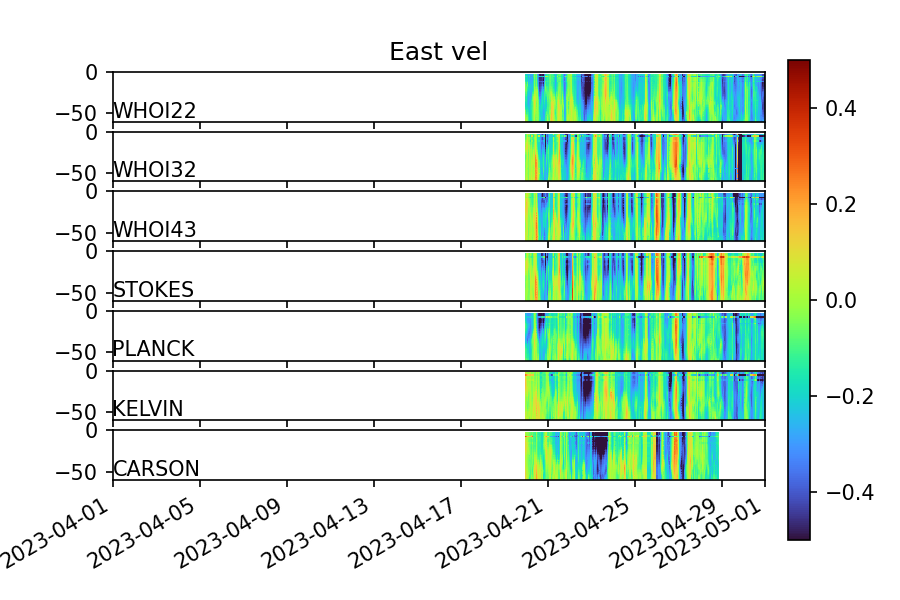

In [13]:
plt.figure()
plt.set_cmap(cmap=plt.get_cmap('turbo'))
n = 0
ax1 = plt.subplot(len(WG_list),1,len(WG_list))
ax1.set_xlim(tmin,tmax)
zmax=-60
for WG in WG_list:
    n=n+1
    ds = eval('adcp_'+WG)
    ax = plt.subplot(len(WG_list),1,n,sharex=ax1)
    im = plt.pcolor(ds.time.values,ds.depth,ds.current_east.transpose(),vmin=vmin,vmax=vmax)
    # plt.contourf(ds.time.values,ds.z_matrix[:,1],ds.current_east,levels)
    plt.ylim(zmax, 0)
    plt.text(tmin,zmax+5,WG)
    if n==1: plt.title('East vel')
fig=plt.gcf()
fig.autofmt_xdate()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.875, 0.1, 0.025, 0.8])
fig.colorbar(im, cax=cbar_ax)

/tmp/ipykernel_378/2140181317.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(WG_list),1,n,sharex=ax1)


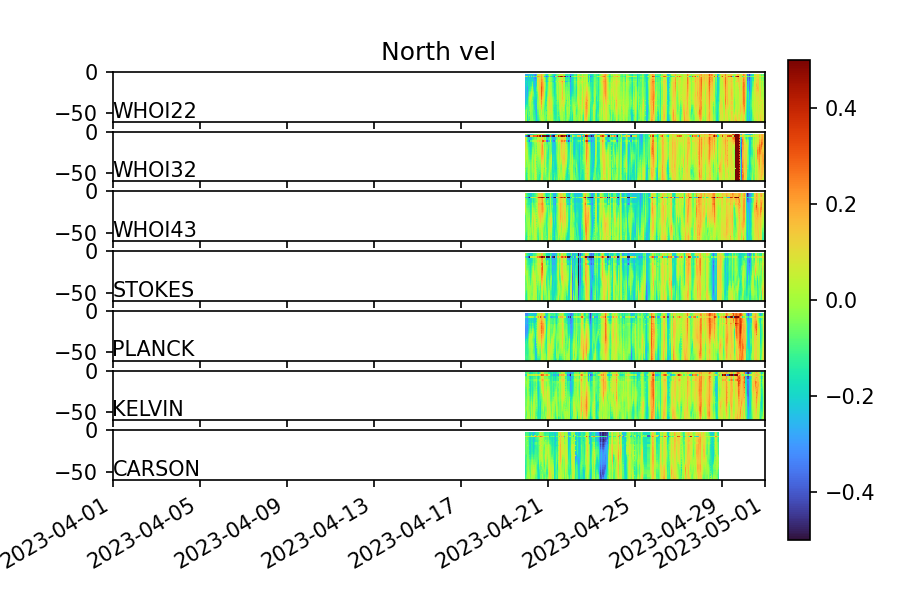

In [14]:
plt.figure()
plt.set_cmap(cmap=plt.get_cmap('turbo'))
n = 0
ax1 = plt.subplot(len(WG_list),1,len(WG_list))
ax1.set_xlim(tmin,tmax)
for WG in WG_list:
    n=n+1
    ds = eval('adcp_'+WG)
    ax = plt.subplot(len(WG_list),1,n,sharex=ax1)
    im = plt.pcolor(ds.time.values,ds.depth,ds.current_north.transpose(),vmin=vmin,vmax=vmax)
    # plt.contourf(ds.time.values,ds.z_matrix[:,1],ds.current_east,levels)
    plt.ylim(-60, 0)
    plt.text(tmin,zmax+5,WG)
    if n==1: plt.title('North vel')
fig=plt.gcf()
fig.autofmt_xdate()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.875, 0.1, 0.025, 0.8])
fig.colorbar(im, cax=cbar_ax)

In [15]:
ds

<xarray.Dataset>
Dimensions:                (time: 661, depth: 50)
Coordinates:
  * time                   (time) datetime64[ns] 2023-04-20T00:02:00 ... 2023...
  * depth                  (depth) float64 -3.93 -5.93 -7.93 ... -99.93 -101.9
Data variables:
    adcp_roll_inst_Avg     (time) float64 ...
    adcp_pitch_inst_Avg    (time) float64 ...
    adcp_heading_inst_Avg  (time) float64 ...
    adcp_temperature_Avg   (time) float64 ...
    current_east           (time, depth) float64 ...
    current_north          (time, depth) float64 ...
    Longitude              (time) float64 ...
    Latitude               (time) float64 ...
Attributes:
    title:    S-MODE IOP2 2023 wave glider
    summary:  real-time wave glider data recorded by SV3 during S-MODE IOP2 c...

In [16]:
t0 = np.datetime64('2023-04-18T12:00:00')
time_tol = np.timedelta64(24,'h')
lon0 = -125.07
lat0 = 36.66
lon_lat_tol = 2
zind = 5

In [17]:

zoom = 2;

if zoom == 0: #wide view of S-MODE ops area and San Francisco
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 39.25)
    zoom_str='_wide'
elif zoom == 1: #centered on S-MODE ops area, but shows San Francisco
    xmin, xmax = (-126.0,-122.0)
    ymin, ymax = (35.5, 39.0)
    zoom_str='_zoom1'
elif zoom == 2: #tight on S-MODE ops area
    xmin, xmax = (-126,-123)
    ymin, ymax = (35.5,38.5)
    zoom_str='_zoom2'
elif zoom == 3: #zoom on eastern part of ops area
    xmin, xmax = (-125.25,-123.75)
    ymin, ymax = (36.5, 37.5)
    zoom_str='zoom3'
elif zoom == 4: #not yet determined
    xmin, xmax = (-125.25,-123.75)
    ymin, ymax = (36.25, 37.25)
    zoom_str='_zoom4'
 

In [18]:
t0 = np.datetime64('2023-04-18T00:00:00')
tmin = t0 - np.timedelta64(30,'h')#np.datetime64('now')
tmax = t0 + np.timedelta64(30,'h')#np.datetime64('now')
z0 = -4
skip = 10
scale = 10


In [19]:
# Function to plot WG position and vel at time of SST image
def plot_WG_vel_vectors(ax,tmin,tmax,scale,skip, **kwargs):
    # List of WGs
    # Read in cleaned ADCP files from all WG
    width = 0.0025
    n=0
    for WG in WG_list:
        ds = eval('adcp_'+WG)
        tind = np.flatnonzero(np.logical_and(ds.time>tmin,ds.time<tmax))
        tind=tind[0:-1:skip]
        zind = np.flatnonzero(np.abs(ds.depth-z0)==np.min(np.abs(ds.depth-z0)))
        if tind.size==0:
            print('Skipping '+WG)
            continue
        else:
            if n == 0:
                Qgeo = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[tind, zind].values),np.squeeze(ds.current_north[tind, zind].values),scale=scale,width = width,transform=ccrs.PlateCarree(),**kwargs)
                ax.scatter(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,s=5,color='k',transform=ccrs.PlateCarree())
                qk = ax.quiverkey(Qgeo, 0.1, 0.75, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')
                width = Qgeo.width
                headwidth = Qgeo.headwidth
                headlength = Qgeo.headlength
                headaxislength = Qgeo.headaxislength
            else:
                Q = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[tind, zind].values),np.squeeze(ds.current_north[tind, zind].values),scale=scale,transform=ccrs.PlateCarree(), width = width, headlength = headlength, headwidth = headwidth, headaxislength = headaxislength, **kwargs)
                ax.scatter(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,s=5,color='k',transform=ccrs.PlateCarree())
            n = n+1 #increment counter
            
    

Skipping WHOI22
Skipping WHOI32
Skipping WHOI43
Skipping STOKES
Skipping PLANCK
Skipping KELVIN
Skipping CARSON


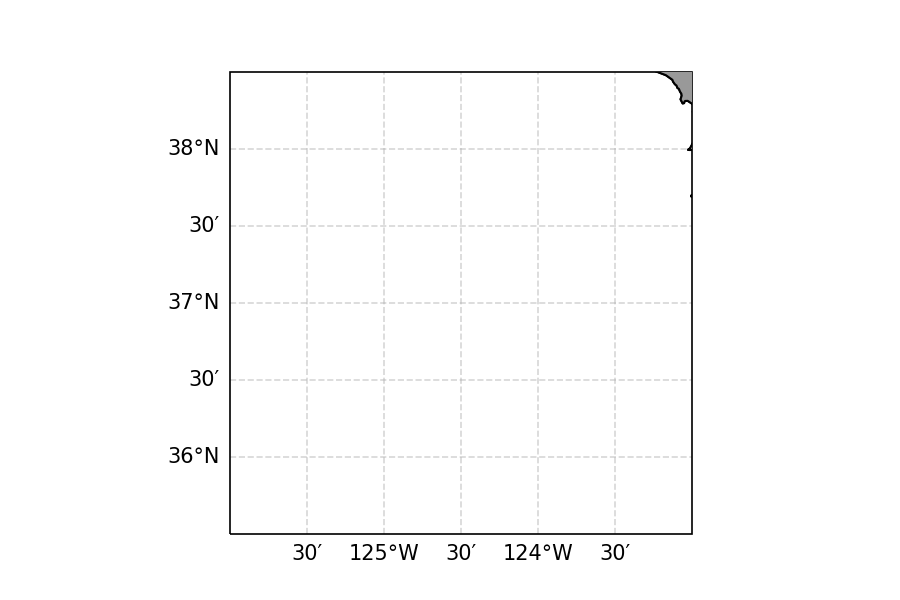

In [20]:


plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
day_str=ds.time.dt.strftime("%Y-%m-%d %H:%M").values[-1]
day_str2=ds.time.dt.strftime("%Y-%m-%d").values[-1]
#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

plot_WG_vel_vectors(ax,tmin,tmax,scale,skip,color='grey',edgecolor='k', linewidth = 1)
plt.savefig(__figdir__+'04_14_2023_WG_zoom_level_' + str(zoom)  + '.' + plotfiletype,transparent=True,**savefig_args)


In [21]:
ds.current_north

<xarray.DataArray 'current_north' (time: 661, depth: 50)>
[33050 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2023-04-20T00:02:00 ... 2023-04-28T21:02:00
  * depth    (depth) float64 -3.93 -5.93 -7.93 -9.93 ... -97.93 -99.93 -101.9
Attributes:
    units:    m/s